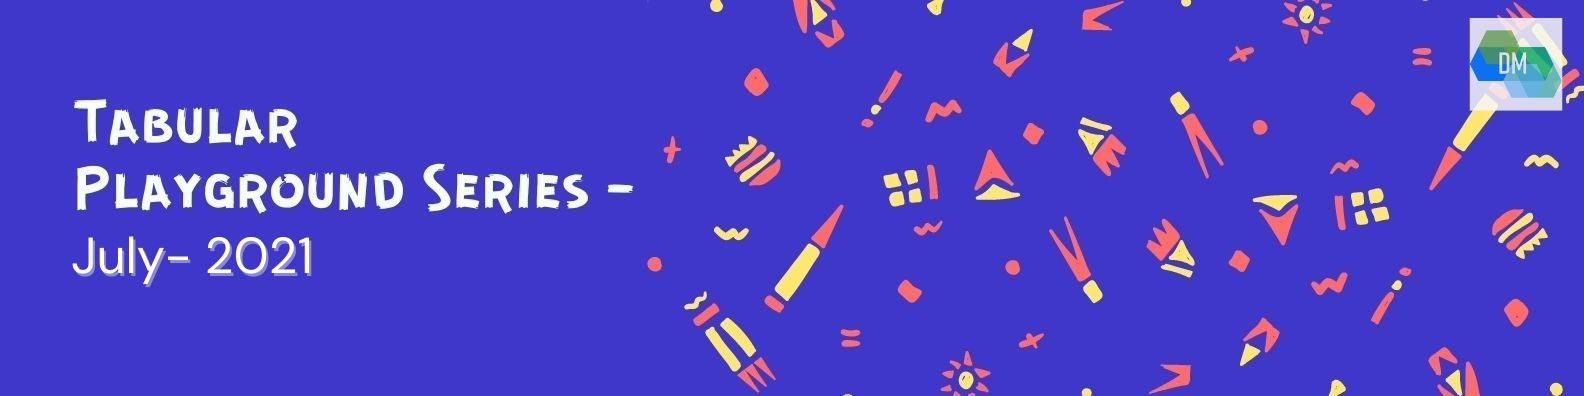

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train= pd.read_csv("../input/tabular-playground-series-jul-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-jul-2021/test.csv")

In [3]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 7111
Total number of columns: 12


In [4]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 2247
Total number of columns: 9


In [5]:
df_train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
deg_C,7111.0,20.878034,7.937917,1.3000,14.9000,20.7000,25.80000,46.100
relative_humidity,7111.0,47.561004,17.398731,8.9000,33.7000,47.3000,60.80000,90.800
absolute_humidity,7111.0,1.110309,0.398950,0.1988,0.8559,1.0835,1.40415,2.231
sensor_1,7111.0,1091.572100,218.537554,620.3000,930.2500,1060.5000,1215.80000,2088.300
sensor_2,7111.0,938.064970,281.978988,364.0000,734.9000,914.2000,1124.10000,2302.600
sensor_3,7111.0,883.903305,310.456355,310.6000,681.0500,827.8000,1008.85000,2567.400
sensor_4,7111.0,1513.238349,350.180310,552.9000,1320.3500,1513.1000,1720.40000,2913.800
sensor_5,7111.0,998.335565,381.537695,242.7000,722.8500,928.7000,1224.70000,2594.600
target_carbon_monoxide,7111.0,2.086219,1.447109,0.1000,1.0000,1.7000,2.80000,12.500
target_benzene,7111.0,10.237083,7.694426,0.1000,4.5000,8.5000,14.20000,63.700


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [8]:
df_train.isna().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [9]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 date_time                 7111
deg_C                      408
relative_humidity          762
absolute_humidity         5451
sensor_1                  3882
sensor_2                  4254
sensor_3                  4251
sensor_4                  4655
sensor_5                  4839
target_carbon_monoxide      95
target_benzene             405
target_nitrogen_oxides    3268
dtype: int64


In [10]:
print(f"Starting Date (Train) {df_train['date_time'].min()}")
print(f"Ending Date (Train) {df_train['date_time'].max()}")

Starting Date (Train) 2010-03-10 18:00:00
Ending Date (Train) 2011-01-01 00:00:00


In [11]:
print(f"Starting Date (Test) {df_test['date_time'].min()}")
print(f"Ending Date (Test) {df_test['date_time'].max()}")

Starting Date (Test) 2011-01-01 00:00:00
Ending Date (Test) 2011-04-04 14:00:00


In [12]:
df_train['date_time'] = df_train['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9
df_test['date_time'] = df_test['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

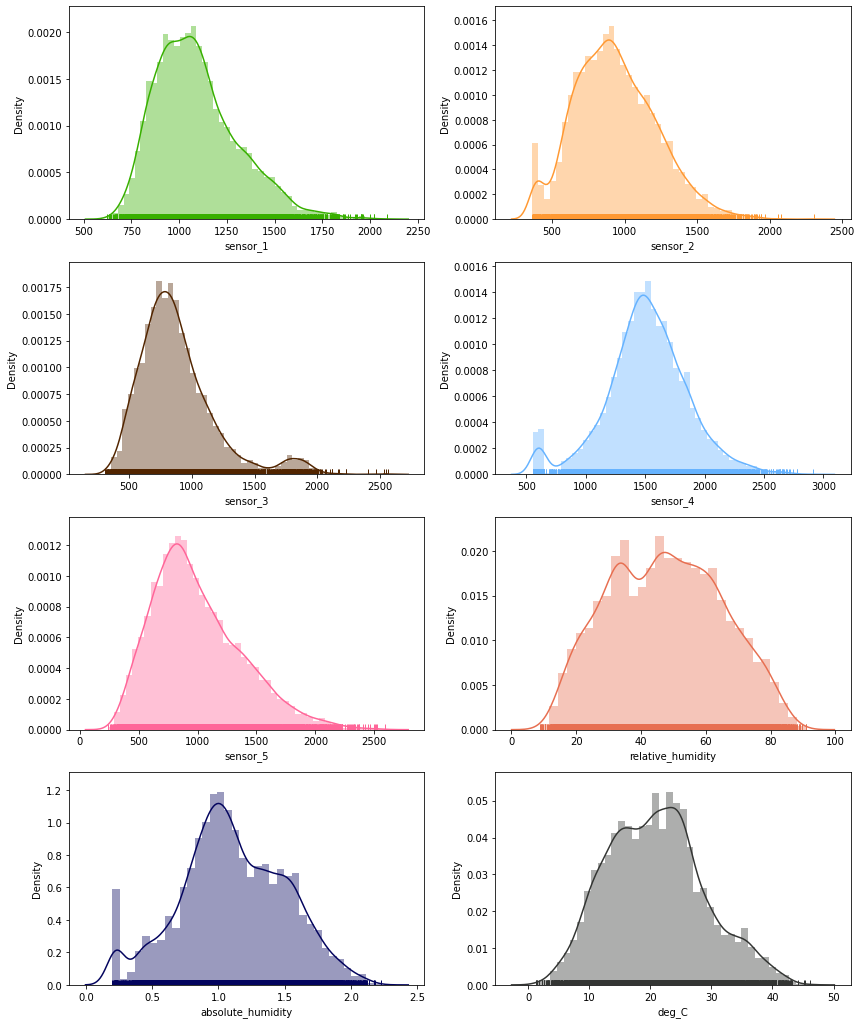

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(14,18))
axs = axs.flatten()
sns.distplot(df_train['sensor_1'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df_train['sensor_2'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df_train['sensor_3'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df_train['sensor_4'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df_train['sensor_5'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df_train['relative_humidity'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df_train['absolute_humidity'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df_train['deg_C'],rug=True,color='#333533',ax=axs[7])
plt.show()

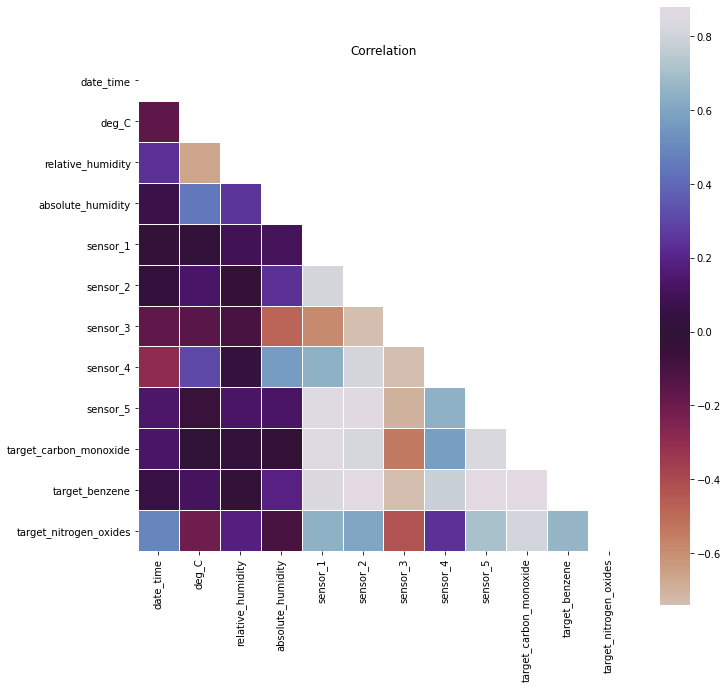

In [14]:
plt.figure(figsize=(11,11))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='twilight_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

<AxesSubplot:xlabel='target_carbon_monoxide', ylabel='Density'>

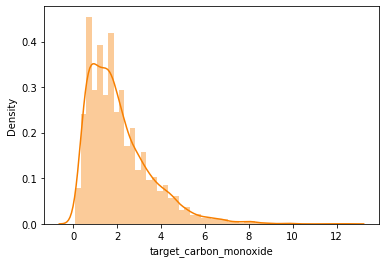

In [15]:
sns.distplot(df_train['target_carbon_monoxide'],color='#f77f00')

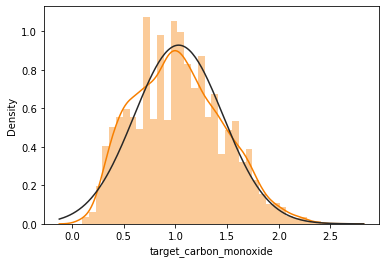

In [16]:
import math
from scipy.stats import norm, skew

df_train['target_carbon_monoxide'] = np.log1p(df_train['target_carbon_monoxide'])
sns.distplot(df_train['target_carbon_monoxide'], fit=norm,color='#f77f00');

<AxesSubplot:xlabel='target_benzene', ylabel='Density'>

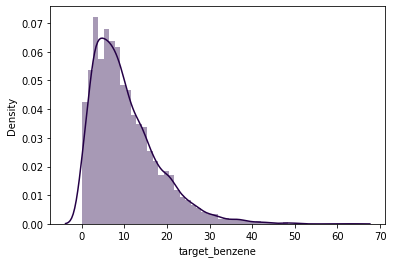

In [17]:
sns.distplot(df_train['target_benzene'],color='#240046')

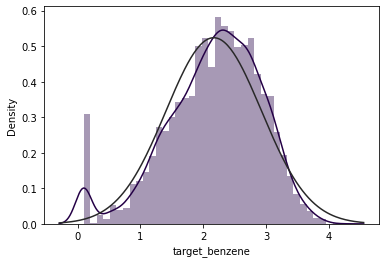

In [18]:
df_train['target_benzene'] = np.log1p(df_train['target_benzene'])
sns.distplot(df_train['target_benzene'], fit=norm,color='#240046');

<AxesSubplot:xlabel='target_nitrogen_oxides', ylabel='Density'>

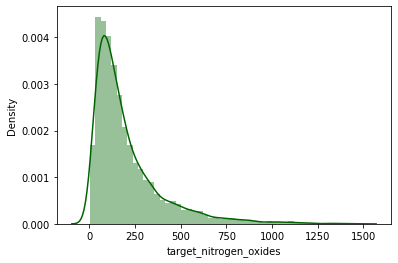

In [19]:
sns.distplot(df_train['target_nitrogen_oxides'],color='#006400')

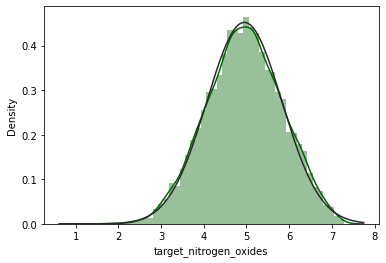

In [20]:
df_train['target_nitrogen_oxides'] = np.log1p(df_train['target_nitrogen_oxides'])
sns.distplot(df_train['target_nitrogen_oxides'], fit=norm,color='#006400');

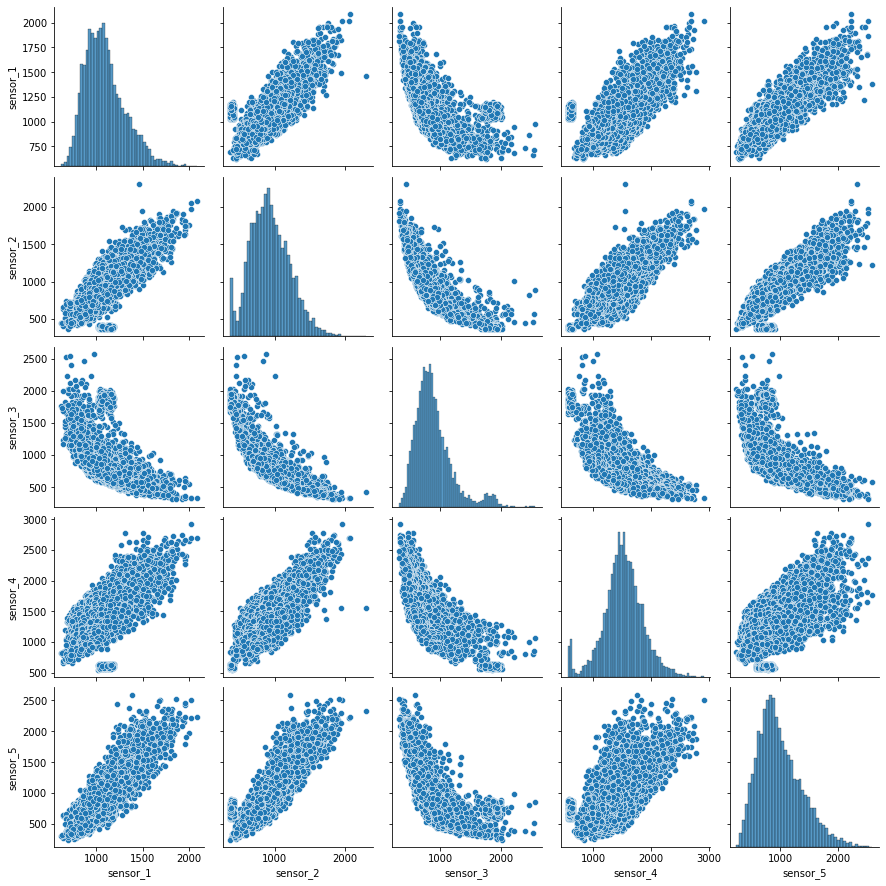

In [21]:
cols = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
sns.pairplot(df_train[cols])

In [22]:
targets = ['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']

In [23]:
df_train['target_carbon_monoxide'] = df_train['target_carbon_monoxide'].values.reshape(-1, 1)
df_train['target_benzene'] = df_train['target_benzene'].values.reshape(-1,1)
df_train['target_nitrogen_oxides'] = df_train['target_nitrogen_oxides'].values.reshape(-1,1)

In [24]:
# define dataset
X = df_train.drop(targets, axis=1).values
y = df_train[targets].values

In [25]:
X.shape,y.shape

((7111, 9), (7111, 3))

In [26]:
# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4977, 9)
y_train: (4977, 3)
X_test: (2134, 9)
y_test: (2134, 3)


In [27]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <h3 style="background-color:#3f37c9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Work in progress </centre></strong></h3>